In [92]:
# 0. Import necessary libraries
import pandas as pd #to read dataset
import numpy as np #arrays indexing, math operations, slicing
import matplotlib.pyplot as plt #for charts
import seaborn as sns #for charts

In [93]:
# point to data path 
data_path = r"D:\python_projects\email_subscription_analysis\email_subscription.csv"

#read the csv file from path and put in the variable df
df = pd.read_csv(data_path)


In [94]:
#read first 5 rows of dataset
df.head()

,id,Type,StatUnmarrieds,City,State,PostalCode,GenderCode,BirthDate,MarriedaritalStatUnmarrieds,EnrolledDate,Living statUnmarrieds
0,00005DCC-4E51-41A5-91C5-6635B24C7D17,BUnmarriedsiness,InActive,NaN,NaN,500024.0,MALE,12-Aug-18,Unmarried,12-Aug-18,coUnmarriedple with children
1,0001F49E-9FE7-11e8-9E9C-00505682069A,Individual,Active,Valsad,GUJARAT,396001.0,MALE,2-Nov-92,Married,14-Aug-18,couple with children
2,0001F4A2-9FE7-11e8-9E9C-00505682069A,Individual,Active,Secunderabad,TELANGANA,500011.0,FEMALE,25-Nov-88,Married,14-Aug-18,couple with children
3,0001F4CD-9FE7-11e8-9E9C-00505682069A,Individual,Active,Nalgonda,TELANGANA,508101.0,MALE,13-Jun-83,Married,14-Aug-18,couple with children
4,0001F4DE-9FE7-11e8-9E9C-00505682069A,Individual,Active,Hyderabad,TELANGANA,500028.0,MALE,13-Jul-75,Married,14-Aug-18,couple with children


In [95]:
#check number of roles and columns
df.shape

(9999, 11)

In [96]:
#check properties of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9999 non-null   object 
 1   Type                         9999 non-null   object 
 2   StatUnmarrieds               9999 non-null   object 
 3   City                         9926 non-null   object 
 4   State                        9874 non-null   object 
 5   PostalCode                   9998 non-null   float64
 6   GenderCode                   9999 non-null   object 
 7   BirthDate                    9999 non-null   object 
 8   MarriedaritalStatUnmarrieds  9999 non-null   object 
 9   EnrolledDate                 9999 non-null   object 
 10  Living statUnmarrieds        9999 non-null   object 
dtypes: float64(1), object(10)
memory usage: 859.4+ KB


In [97]:
#summary description of numeric column
df.describe()

,PostalCode
count,9998.000000
mean,473095.998700
std,84723.960236
min,8905.000000
25%,411030.500000
50%,500034.000000
75%,500082.000000
max,854337.000000


In [98]:
#isolate only postal code and analyse
PostalCode = df["PostalCode"]
percentile10 = np.percentile(PostalCode,10)
print(percentile10)

nan


In [100]:
#find non-numeric columns
non_numeric = df.dtypes[df.dtypes == 'object'].index
print(non_numeric)

#summarize non-numeric columns 
df[non_numeric].describe()

Index(['id', 'Type', 'StatUnmarrieds', 'City', 'State', 'GenderCode',
       'BirthDate', 'MarriedaritalStatUnmarrieds', 'EnrolledDate',
       'Living statUnmarrieds'],
      dtype='object')


,id,Type,StatUnmarrieds,City,State,GenderCode,BirthDate,MarriedaritalStatUnmarrieds,EnrolledDate,Living statUnmarrieds
count,9999,9999,9999,9926,9874,9999,9999,9999,9999,9999
unique,9999,4,3,391,37,4,6719,2,577,5
top,00005DCC-4E51-41A5-91C5-6635B24C7D17,Individual,Active,Hyderabad,TELANGANA,MALE,1-Jan-00,Married,12-Aug-18,couple with children
freq,1,9484,9899,2639,4304,6886,244,9675,209,4731


#Data Cleaning

In [101]:
#1 Correcting wrong column names

#Rename 'GenderCode' to 'Gender'
df.rename(columns={'GenderCode': 'Gender'}, inplace=True)

# Rename 'StatUnmarrieds' to 'Status'
df.rename(columns={'StatUnmarrieds': 'Status'}, inplace=True)

# Rename 'MarriedaritalStatUnmarrieds' to 'Marital_Status'
df.rename(columns={'MarriedaritalStatUnmarrieds': 'Marital_Status'}, inplace=True)

# Rename 'Living_statUnmarrieds' to 'Living_Status'
df.rename(columns={'Living statUnmarrieds': 'Living_Status'}, inplace=True)

# print(df)

In [129]:
#2. Correcting spelling errors in field

#Replace 'Not Mentioned' with 'Other' under the Gender column
df['Gender'].replace('Not Mention', 'Other', inplace=True)

#Correct 'IndividUnmarriedal' to 'Individual' and 'BUnmarriedsiness' to 'Business' under the Type column
df['Type'].replace({'IndividUnmarriedal': 'Individual', 'BUnmarriedsiness': 'Business'}, inplace=True)

#Correct 'coUnmarriedple with children' to 'Couple Unmarried with children' and 
# 'CoUnmarriedple withoUnmarriedt children' to 'Couple Unmarried without children' under the Living_Status column
df['Living_Status'].replace({
    'coUnmarriedple with children': 'Couple Unmarried with children',
    'CoUnmarriedple withoUnmarriedt children': 'Couple Unmarried without children'
}, inplace=True)

print(df)

                                        id        Type    Status  \
0     00005DCC-4E51-41A5-91C5-6635B24C7D17    Business  InActive   
1     0001F49E-9FE7-11e8-9E9C-00505682069A  Individual    Active   
2     0001F4A2-9FE7-11e8-9E9C-00505682069A  Individual    Active   
3     0001F4CD-9FE7-11e8-9E9C-00505682069A  Individual    Active   
4     0001F4DE-9FE7-11e8-9E9C-00505682069A  Individual    Active   
...                                    ...         ...       ...   
9994  0476D7F9-6B51-11e8-B278-0050569D3164  Individual    Active   
9995  0476D7FD-6B51-11e8-B278-0050569D3164  Individual    Active   
9996  0476D812-6B51-11e8-B278-0050569D3164  Individual    Active   
9997  0476D81A-6B51-11e8-B278-0050569D3164  Individual    Active   
9998  0476D821-6B51-11e8-B278-0050569D3164  Individual    Active   

                City           State  PostalCode  Gender  BirthDate  \
0                NaN             NaN    500024.0    Male 2018-08-12   
1             Valsad         Gujarat    3

In [120]:
#3 Transforming values into proper cases

#Transform values under the State, Gender, and Living Status columns to Proper Cases
df['State'] = df['State'].str.title()
df['Gender'] = df['Gender'].str.title()
df['Living_Status'] = df['Living_Status'].str.title()

# Print the modified DataFrame to verify the changes
# print(df)


In [183]:
#6. Date Extraction
#convert to date data type
df['EnrolledDate'] = df['EnrolledDate'].astype('datetime64[ns]')

#Convert Enrolled date to proper date format
# df['EnrolledDate'] = pd.to_datetime(df['EnrolledDate'], format='%d-%b-%y')

# #Create a new column Day and extract the day from the date under the Enrolled on column
df['Day'] = pd.to_datetime(df['EnrolledDate']).dt.day

# # Create a new column Month and extract the month from the date under the Enrolled on column
df['Month'] = pd.to_datetime(df['EnrolledDate']).dt.month_name()

# #Create a new column Year and extract the year from the date under the Enrolled on column
df['Year'] = pd.to_datetime(df['EnrolledDate']).dt.year


# print(df)



In [184]:
#10. Calculating age from date of birth

#Convert Date of birth date to proper date format
df['BirthDate'] = df['BirthDate'].astype('datetime64[ns]')

# Create a new column Age and calculate the age from the BirthDate column
df['Age'] = pd.to_datetime('today').year - pd.to_datetime(df['BirthDate']).dt.year

# print(df)


In [110]:
#11 Grouping Age

# Define bin edges
bin_edges = [0, 25, 35, 50, float('inf')]

# Define bin labels
bin_labels = ['0-25', '26-35', '36-50', '51+']

# Create a new column 'Age_Group' based on the bins
df['Age_Group'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Print the DataFrame with the new 'Age_Group' column
print(df[['Age', 'Age_Group']])

      Age Age_Group
0       5      0-25
1      31     26-35
2      35     36-50
3      40     36-50
4      48     36-50
...   ...       ...
9994   26     26-35
9995   43     36-50
9996   39     36-50
9997   29     26-35
9998   46     36-50

[9999 rows x 2 columns]


#Performing ANALYSIS

In [190]:
#Count of subscribers
SubscriberCount = df['id'].count()
print("Count of subscribers:", SubscriberCount)

Count of subscribers: 9999


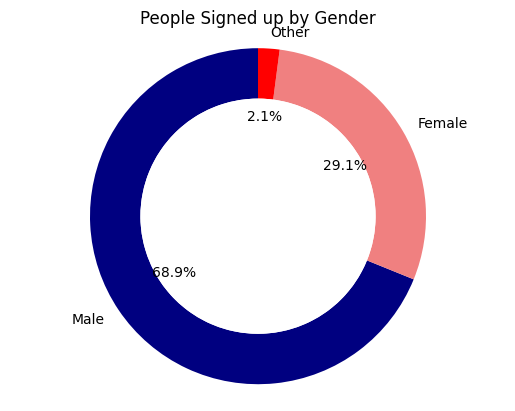

In [192]:
# Group by 'Gender' and count the number of people in each group
gender_counts = df['Gender'].value_counts()

# Specify custom colors for each category
custom_colors = ['navy', 'lightcoral', 'red', 'lightpink', 'lightskyblue']  # Replace with your desired colors

# Plotting the donut chart
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=custom_colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Display the chart
plt.title("People Signed up by Gender")
plt.show()

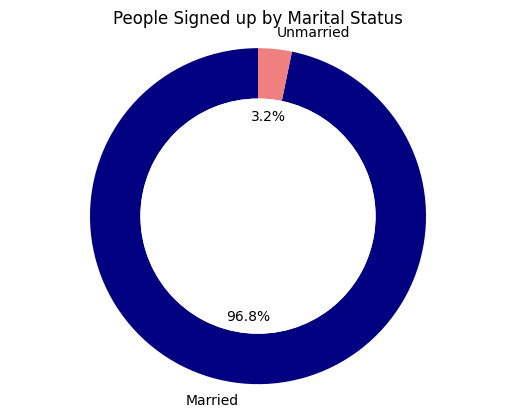

In [188]:
# Group by 'Marital_Status' and count the number of people in each group
marital_status_counts = df['Marital_Status'].value_counts()

# Specify custom colors for each category
custom_colors = ['navy', 'lightcoral']  # Replace with your desired colors

# Plotting the donut chart with custom colors
fig, ax = plt.subplots()
ax.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=custom_colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Display the chart
plt.title("People Signed up by Marital Status")
plt.show()

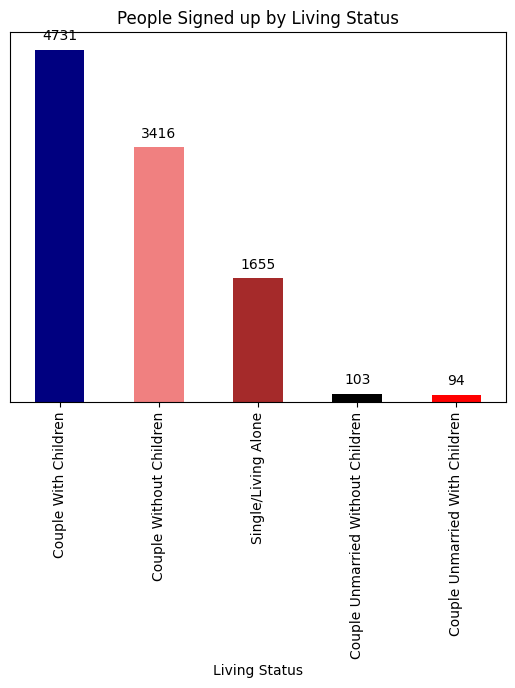

In [196]:
# Group by 'Living_Status' and count the number of people in each group
living_status_counts = df['Living_Status'].value_counts()

# Specify custom colors for each category
custom_colors = ['navy', 'lightcoral', 'brown', 'black', 'red', 'green']  # Replace with your desired colors

# Plotting the column chart
ax = living_status_counts.plot(kind='bar', color=custom_colors)

# Adding data labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Removing the vertical axis
ax.get_yaxis().set_visible(False)

# Adding labels and title
plt.xlabel('Living Status')
plt.title('People Signed up by Living Status')

# Display the chart
plt.show()

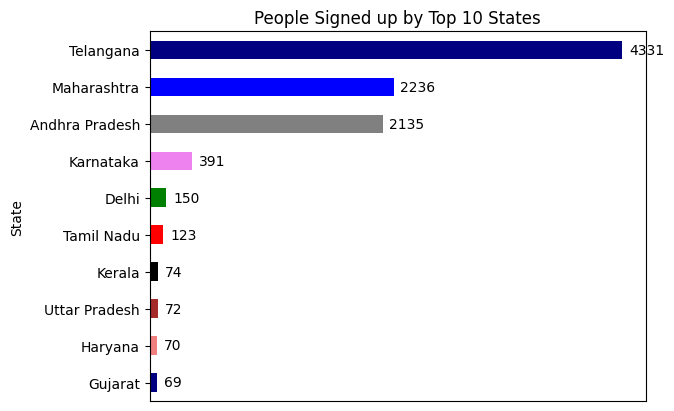

In [201]:
# Group by 'State' and count the number of people in each state
state_counts = df['State'].value_counts()

# Specify custom colors for each category
custom_colors = ['navy', 'lightcoral', 'brown', 'black', 'red', 'green', 'violet', 'gray', 'blue']  # Replace with your desired colors


# Sort the values in descending order
top_10_states = state_counts.head(10).sort_values(ascending=True)

# Plotting the horizontal bar chart with navy blue color
ax = top_10_states.plot(kind='barh', color=custom_colors)

# Adding data labels with adjusted positions
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                xy=(width, p.get_y() + p.get_height() / 2.),
                xytext=(5, 0),  # Adjust the margin from the right edge
                textcoords='offset points',
                ha='left', va='center')

# Removing the vertical axis
ax.get_xaxis().set_visible(False)

# Adding labels and title
plt.ylabel('State')
plt.xlabel('Number of People')
plt.title('People Signed up by Top 10 States')

# Display the chart
plt.show()

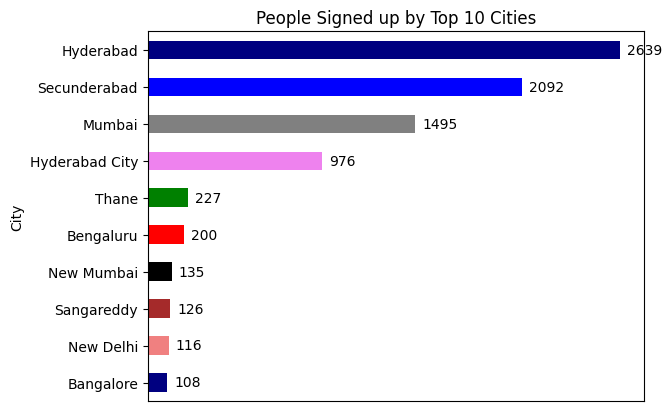

In [202]:
# Group by 'State' and count the number of people in each state
city_counts = df['City'].value_counts()

# Specify custom colors for each category
custom_colors = ['navy', 'lightcoral', 'brown', 'black', 'red', 'green', 'violet', 'gray', 'blue']  # Replace with your desired colors

# Sort the values in descending order
top_10_cities = city_counts.head(10).sort_values(ascending=True)

# Plotting the horizontal bar chart with navy blue color
ax = top_10_cities.plot(kind='barh', color=custom_colors)

# Adding data labels with adjusted positions
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                xy=(width, p.get_y() + p.get_height() / 2.),
                xytext=(5, 0),  # Adjust the margin from the right edge
                textcoords='offset points',
                ha='left', va='center')

# Removing the vertical axis
ax.get_xaxis().set_visible(False)

# Adding labels and title
plt.ylabel('City')
plt.xlabel('Number of People')
plt.title('People Signed up by Top 10 Cities')

# Display the chart
plt.show()

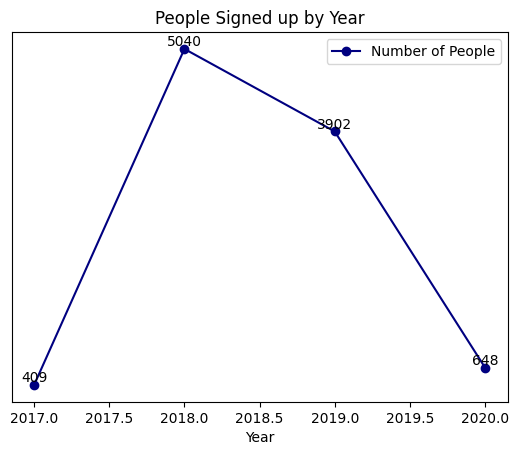

In [203]:

# Group by 'Year' and count the number of people in each year
yearly_counts = df['Year'].value_counts().sort_index()

# Plotting the red line chart with dots
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='navy', linestyle='-', label='Number of People')

# Adding data labels
for i, txt in enumerate(yearly_counts.values):
    plt.annotate(txt, (yearly_counts.index[i], txt), ha='center', va='bottom')

# Hide the horizontal axis
plt.gca().get_yaxis().set_visible(False)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('People Signed up by Year')

# Display the chart
plt.legend()
plt.show()

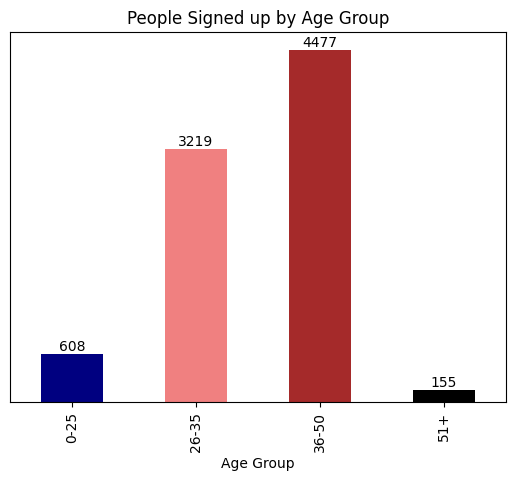

In [207]:
# Group by 'Age_Group' and count the number of people in each age group
age_group_counts = df['Age_Group'].value_counts().sort_index()

# Specify custom colors for each category
custom_colors = ['navy', 'lightcoral', 'brown', 'black', 'red', 'green', 'violet', 'gray', 'blue']  # Replace with your desired colors

# Plotting the bar chart
ax = age_group_counts.plot(kind='bar', color=custom_colors)

# Adding data labels
for i, txt in enumerate(age_group_counts.values):
    plt.annotate(txt, (i, txt), ha='center', va='bottom')

# Removing the vertical axis
ax.get_yaxis().set_visible(False)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.title('People Signed up by Age Group')

# Display the chart
plt.show()